In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Dataset 1

In [4]:
df1 = pd.read_csv('./datasets/dataset_1.csv', index_col=0)

In [11]:
# Split dataset
X = df1.drop('labels', axis=1)
y = df1['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
df1.head()

,var1,var2,labels
0,0.336956,0.639096,class_1
1,0.434911,0.828885,class_1
2,0.550938,0.408508,class_1
3,0.086163,1.046761,class_1
4,0.689772,0.404202,class_1


In [6]:
df1.describe()

,var1,var2
count,500.000000,500.000000
mean,0.125813,0.135211
std,0.483135,0.485897
min,-1.102830,-1.016498
25%,-0.244530,-0.241561
50%,0.084797,0.160035
75%,0.517539,0.495548
max,1.397078,1.533363


In [7]:
# Check NaNs
df1.isna().sum()

var1      0
var2      0
labels    0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18584\269102283.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df1['var1'], df1['var2'], c=color, cmap='viridis')


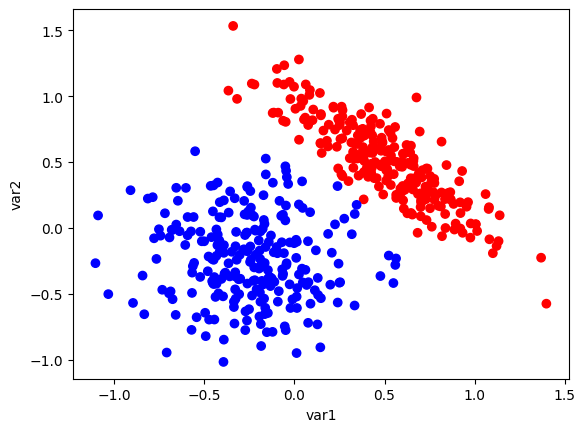

In [9]:
color = df1['labels'].map({'class_1': 'red', 'class_2': 'blue'})
plt.scatter(df1['var1'], df1['var2'], c=color, cmap='viridis')

plt.xlabel('var1')
plt.ylabel('var2')

plt.show()

Dataset 1 Naive Bayes Training

In [13]:
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

GaussianNB()

In [14]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [19]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance 
    including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    # Create figure and subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
            
    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('purple')
              
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.94      1.00      0.97       190
     class_2       1.00      0.94      0.97       210

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.94      1.00      0.97        60
     class_2       1.00      0.90      0.95        40

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100





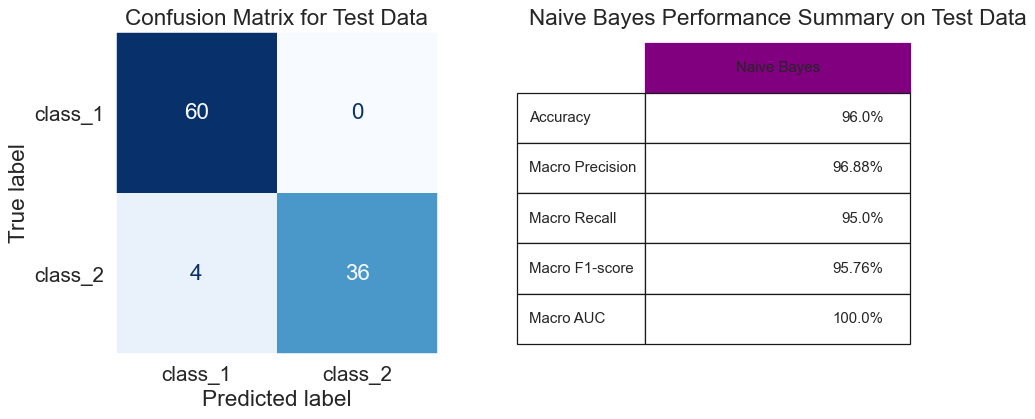

In [20]:
model_evaluation(model_nb, X_train, X_test, y_train, y_test, 'Naive Bayes')

Dataset 1 Logistic Regression Training

In [23]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

LogisticRegression()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.98      1.00      0.99       190
     class_2       1.00      0.99      0.99       210

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

     class_1       0.98      1.00      0.99        60
     class_2       1.00      0.97      0.99        40

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100





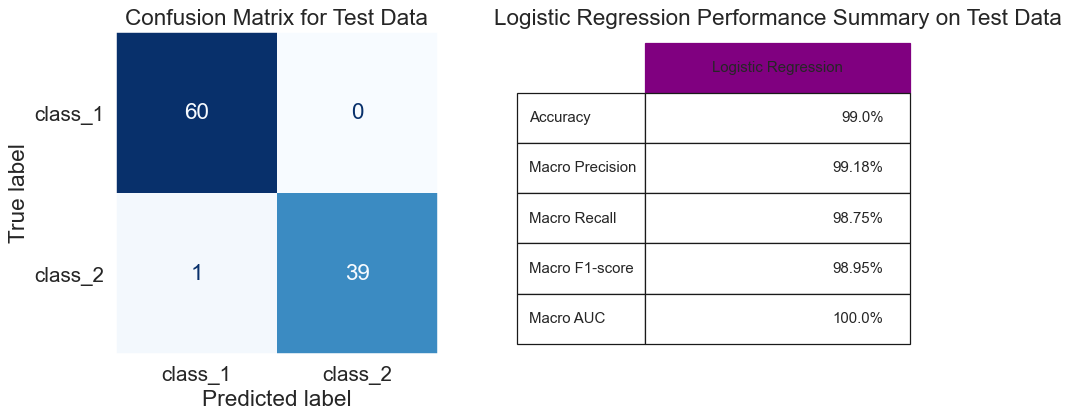

In [24]:
model_evaluation(model_lr, X_train, X_test, y_train, y_test, 'Logistic Regression')